In [12]:
import wbgapi as wb
import wbdata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

<h1 style="color:black; background-color:white; padding:10px; padding-bottom:10px;text-align: center;">To be rich or to be green</h1>

---

In [4]:
def load_and_name_db_WB(db, *args):
    global df_name
    df_name = db
    globals()[df_name] = wb.data.DataFrame(value1, wb.region.members(value2), range(value3, value4))
    globals()[df_name].columns = new_column_names
    return globals()[df_name]

In [5]:
value1 = ['EN.ATM.CO2E.PC','SL.GDP.PCAP.EM.KD']
new_column_names = ['CO2_per_capita', "GDP_per_capita"]
value2 = "WLD"
value3 = 2019
value4 = 2020

load_and_name_db_WB("df_original", value1, value2, value3, value4, new_column_names)

,CO2_per_capita,GDP_per_capita
economy,,
ABW,NaN,NaN
AFG,0.160850,8842.504595
AGO,0.779292,17314.051641
ALB,1.691968,30717.371022
AND,6.573595,NaN
...,...,...
XKX,NaN,NaN
YEM,0.351701,NaN
ZAF,7.568640,44759.518380


In [16]:
def plot_ransac_regression(db_name, start_year, end_year):
    num_years = end_year - start_year + 1
    num_rows = (num_years - 1) // 3 + 1
    num_cols = min(num_years, 3)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    fig.tight_layout(pad=5.0)
    
    for year in range(start_year, end_year + 1):
        data = db_name.dropna()
        
        # Check if data contains at least one valid data point
        if data.shape[0] > 0:
            # Fit RANSACRegressor
            ransac = RANSACRegressor()
            ransac.fit(data[['CO2_per_capita']], data['GDP_per_capita'])
            
            # Obtain inlier and outlier mask
            inlier_mask = ransac.inlier_mask_
            outlier_mask = np.logical_not(inlier_mask)
            
            # Extract inlier and outlier data points
            inliers = data[inlier_mask]
            outliers = data[outlier_mask]
            
            # Calculate R-squared score
            r2 = ransac.score(data[['CO2_per_capita']], data['GDP_per_capita'])
            
            # Plot data points, regression line, and annotate R-squared score
            row = (year - start_year) // 3
            col = (year - start_year) % 3
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.scatter(data['CO2_per_capita'], data['GDP_per_capita'], color='blue', label='Data Points')
            ax.scatter(outliers['CO2_per_capita'], outliers['GDP_per_capita'], color='red', label='Outliers')
            ax.plot(data['CO2_per_capita'], ransac.predict(data[['CO2_per_capita']]), color='green', label='RANSAC Regression Line')
            ax.set_xlabel('CO2_per_capita', fontsize=12)
            ax.set_ylabel('GDP_per_capita', fontsize=12)
            ax.set_title(f'RANSAC Regression {year}-{year+1}', fontsize=14)
            ax.annotate(f'R-squared = {r2:.2f}', xy=(0.5, 0.1), xycoords='axes fraction', fontsize=12)
            ax.legend(fontsize=12)
    
    plt.show()

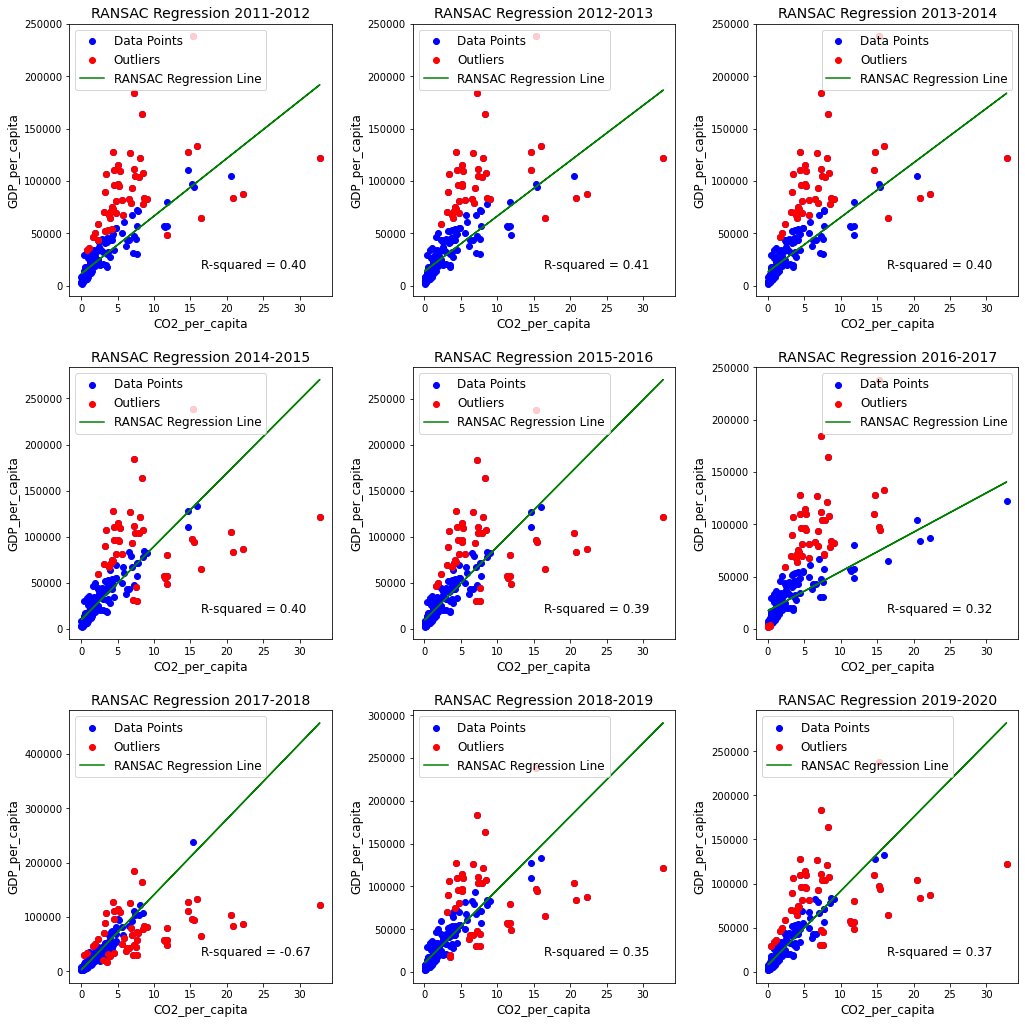

In [17]:
plot_ransac_regression(df_original, 2011, 2019)